In [10]:
import numpy as np
np.random.seed(0) # this was the random seed used during the initial construction of the code
import matplotlib.pyplot as plt
import seaborn as sns

# Import the functions from the package
from my_package import functions

### Set variables to create a synthetic dataset with samples containing features that are ~N(0,$\Sigma$)

In [11]:
samples = 1000
features = 2
latent = 1
var, covar = 1, 0.5 # variance and covariance of the data

# create data consisting of n samples, each with p features, sampled from a multivariate normal distribution with mean mu and covariance matrix sigma

# create mean vector
mu = np.zeros(features)
# create covariance matrix
sigma = np.full((features, features), covar)
np.fill_diagonal(sigma, var)

# generate data
data = np.random.multivariate_normal(mu, sigma, samples)
data = data.T

print("Data shape:", data.shape)
assert data.shape[0] == features
assert data.shape[1] == samples

Data shape: (2, 1000)


### Plot the raw data (1st two features) and the covariance matrix

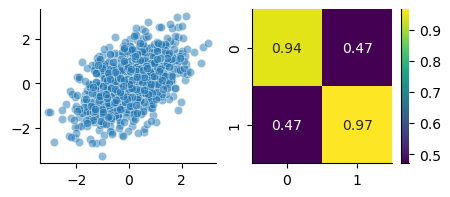

In [12]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(5,2))
sns.scatterplot(x=data[0,:],
                y = data[1,:],
                ax=ax1,
                alpha=0.5)
sns.heatmap(np.cov(data), annot=True, cmap='viridis', ax=ax2)  # 'annot=True' displays the values in the cells
sns.despine()

### Run the Factor Analysis algorithm

In [13]:
# Randomly initialize Lambda and Psi
Lambda = np.random.randn(features, latent)  # Factor loading matrix for one factor
Psi = np.diag(np.random.rand(features))  # Specific variance matrix (diagonal)
print("Lambda shape: ", Lambda.shape)
print("Psi shape: ", Psi.shape)

# Run EM algorithm
# Lambda and Psi are parameters of the model
# delta_Lambda_list and delta_Psi_list are the changes in Lambda and Psi at each iteration
Lambda, Psi, delta_Lambda_list, delta_Psi_list = functions.em_factor_analysis(data, Lambda, Psi, tol=0.000001, max_iter=1000)

Lambda shape:  (2, 1)
Psi shape:  (2, 2)


### Assess convergence of the algorithm

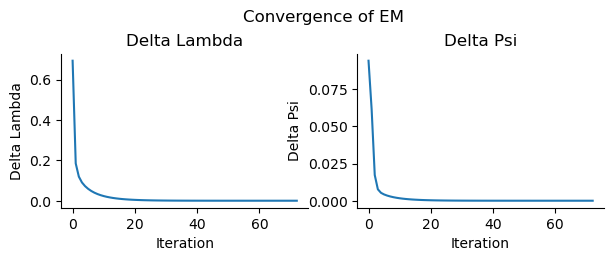

In [19]:
# plot the convergence of the algorithm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2))

def plot_convergence(delta_list, delta_name, ax):
    sns.lineplot(x=range(len(delta_list)), 
                y=delta_list,
                ax=ax)
    ax.set_title(f"Delta {delta_name}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel(f"Delta {delta_name}")

plot_convergence(delta_Lambda_list, "Lambda", ax1)
plot_convergence(delta_Psi_list, "Psi", ax2)
plt.suptitle("Convergence of EM", y=1.1)

sns.despine()

### Check whether the algorithm has recovered the covariance matrix by comparing the original and modeled covariance matrices

Fro norm b/t original and model covariance0.0008741496341266082


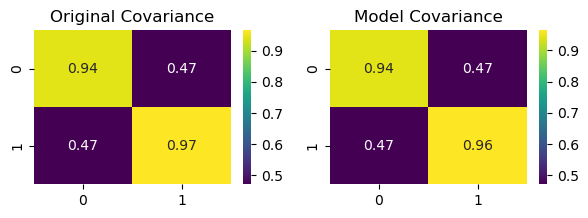

In [20]:
original_covariance = np.cov(data)
model_covariance = Lambda @ Lambda.T + Psi

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2))

sns.heatmap(original_covariance, annot=True, cmap='viridis', ax=ax1)  
sns.heatmap(model_covariance, annot=True, cmap='viridis', ax=ax2)  
ax1.set_title("Original Covariance")
ax2.set_title("Model Covariance")


error = np.linalg.norm(original_covariance - model_covariance, 'fro')
print(f"Fro norm b/t original and model covariance {error}")

### Check if latent variables are normally distributed, as assumed by the Factor Analysis model

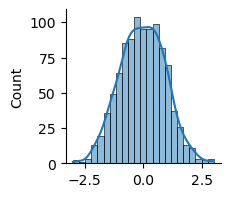

In [16]:
# Does the distribution of the latent variable look normal? This is an assumption of the Factor Analysis model
E_z, _ = functions.E_step(data, Lambda, Psi)
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
sns.histplot(E_z[0,:], kde=True)
sns.despine()

### Use multiple restarts since this is a non-convex optimization problem

In [17]:


# errors = []
# Lambdas = []
# Psis = []
# for i in range(100):
#     # Randomly initialize Lambda and Psi
#     Lambda = np.random.randn(features, latent)  # Factor loading matrix for one factor
#     Psi = np.diag(np.random.rand(features))  # Specific variance matrix (diagonal)

#     Lambda, Psi, delta_Lambda_list, delta_Psi_list = functions.em_factor_analysis(data, Lambda, Psi, tol=0.000001, max_iter=1000)

#     Lambdas.append(Lambda)
#     Psis.append(Psi)

#     original_covariance = np.cov(data)
#     model_covariance = Lambda @ Lambda.T + Psi
#     error = np.linalg.norm(original_covariance - model_covariance, 'fro')
#     errors.append(error)


In [18]:
# # find the index of the lowest error
# index = np.argmin(errors)
# Lambda_best = Lambdas[index]
# Psi_best = Psis[index]

# model_covariance = Lambda @ Lambda.T + Psi

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
# sns.heatmap(original_covariance, annot=True, cmap='viridis', ax=ax1)  
# sns.heatmap(model_covariance, annot=True, cmap='viridis', ax=ax2)  